# **PROBLEM STATEMENT**
**[Janatahack: Healthcare Analytics II](https://datahack.analyticsvidhya.com/contest/janatahack-healthcare-analytics-ii/)**

Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital. 

This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

Suppose you have been hired as Data Scientist of HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.
The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

# **DATA**

In [ ]:
import pandas as pd

train_data_dict = pd.read_csv('/content/drive/My Drive/ML_challenges/analytics_vidhya_healthcare/train_data_dict.csv')

In [ ]:
train_data_dict

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [ ]:
import pandas as pd
train_data = pd.read_csv('/content/drive/My Drive/ML_challenges/analytics_vidhya_healthcare/train.csv')

In [ ]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2,31397,7,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2,31397,7,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2,31397,7,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2,31397,7,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2,31397,7,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
import numpy as np
np.unique(train_data['Stay'].values)

array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-100', 'More than 100 Days'], dtype=object)

**11 class classification problem**

In [ ]:
train_data.shape

(318438, 18)

In [ ]:
train_data = train_data.drop_duplicates()
train_data.shape

(318438, 18)

In [ ]:
train_data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


## **IMPUTATION**

In [ ]:
for col in train_data.columns:
  print(train_data[[col]].isna().any())

case_id    False
dtype: bool
Hospital_code    False
dtype: bool
Hospital_type_code    False
dtype: bool
City_Code_Hospital    False
dtype: bool
Hospital_region_code    False
dtype: bool
Available Extra Rooms in Hospital    False
dtype: bool
Department    False
dtype: bool
Ward_Type    False
dtype: bool
Ward_Facility_Code    False
dtype: bool
Bed Grade    True
dtype: bool
patientid    False
dtype: bool
City_Code_Patient    True
dtype: bool
Type of Admission    False
dtype: bool
Severity of Illness    False
dtype: bool
Visitors with Patient    False
dtype: bool
Age    False
dtype: bool
Admission_Deposit    False
dtype: bool
Stay    False
dtype: bool


In [ ]:
for col in train_data.columns:
  print(train_data[[col]].isnull().any())

case_id    False
dtype: bool
Hospital_code    False
dtype: bool
Hospital_type_code    False
dtype: bool
City_Code_Hospital    False
dtype: bool
Hospital_region_code    False
dtype: bool
Available Extra Rooms in Hospital    False
dtype: bool
Department    False
dtype: bool
Ward_Type    False
dtype: bool
Ward_Facility_Code    False
dtype: bool
Bed Grade    True
dtype: bool
patientid    False
dtype: bool
City_Code_Patient    True
dtype: bool
Type of Admission    False
dtype: bool
Severity of Illness    False
dtype: bool
Visitors with Patient    False
dtype: bool
Age    False
dtype: bool
Admission_Deposit    False
dtype: bool
Stay    False
dtype: bool


In [ ]:
train_data['City_Code_Patient'].unique()

array([ 7.,  8.,  2.,  5.,  6.,  3.,  4.,  1.,  9., 14., nan, 25., 15.,
       12., 10., 28., 24., 23., 20., 11., 13., 21., 18., 16., 26., 27.,
       22., 19., 31., 34., 32., 30., 29., 37., 33., 35., 36., 38.])

In [ ]:
train_data['Bed Grade'].unique()

array([ 2.,  3.,  4.,  1., nan])

**City code patient and Bed grade columns have missing values.**

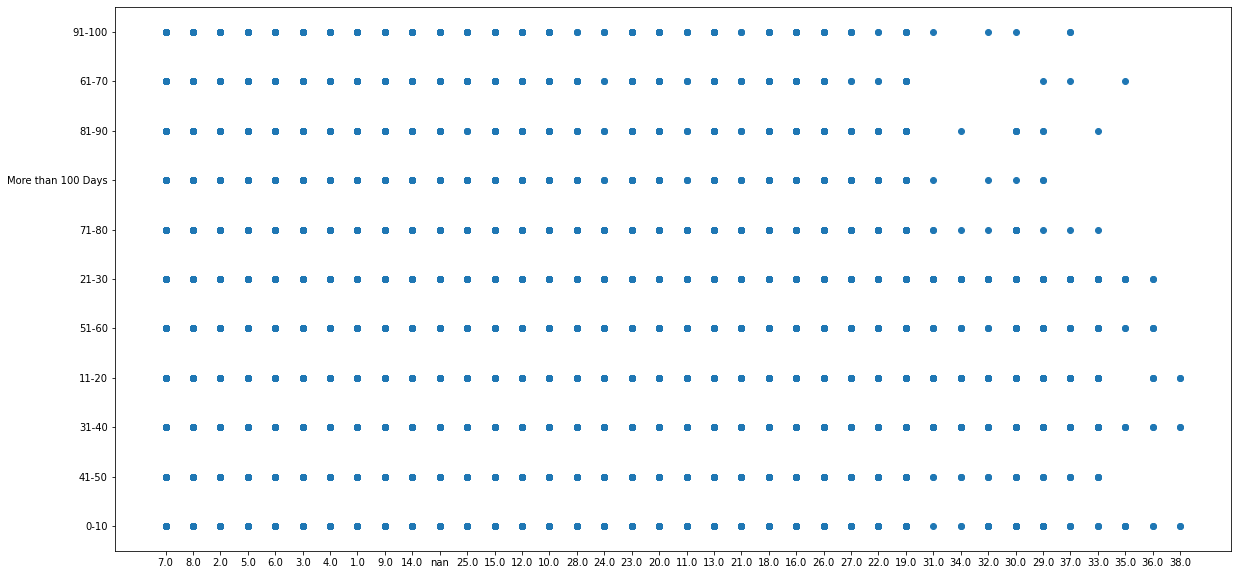

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(train_data['City_Code_Patient'].apply(str),train_data['Stay'])
plt.show()

**NAN is present across all the classes for city_code_patient, hence assigning a new city code for NAN**

In [ ]:
import numpy as np

train_data['City_Code_Patient'] = train_data['City_Code_Patient'].apply(lambda x: 17 if np.isnan(x) else int(x) )

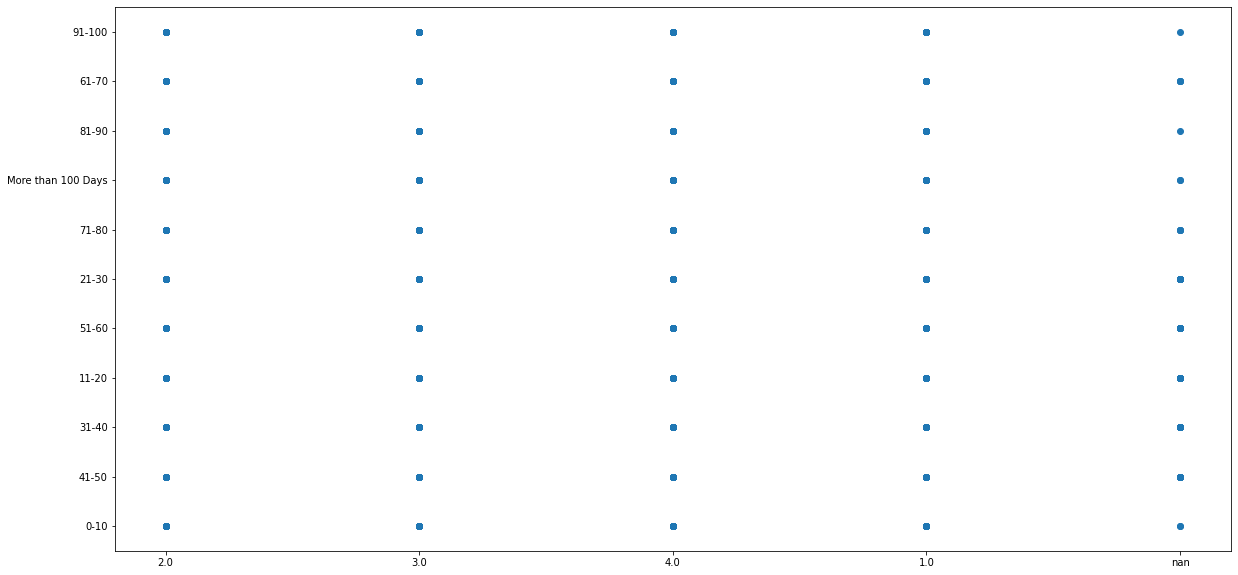

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(train_data['Bed Grade'].apply(str),train_data['Stay'])
plt.show()

In [ ]:
train_data['Bed Grade'] = train_data['Bed Grade'].apply(lambda x: 5 if np.isnan(x) else int(x) )

In [ ]:
train_data.to_csv('/content/drive/My Drive/ML_challenges/analytics_vidhya_healthcare/train.csv',index=None)

In [ ]:
import pandas as pd
test_data = pd.read_csv('/content/drive/My Drive/ML_challenges/analytics_vidhya_healthcare/test.csv')

In [ ]:
test_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [ ]:
import numpy as np

test_data['City_Code_Patient'] = test_data['City_Code_Patient'].apply(lambda x: 17 if np.isnan(x) else int(x) )
test_data['Bed Grade'] = test_data['Bed Grade'].apply(lambda x: 5 if np.isnan(x) else int(x) )

In [ ]:
test_data.to_csv('/content/drive/My Drive/ML_challenges/analytics_vidhya_healthcare/test.csv',index=None)

# **EDA**

In [ ]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2,31397,7,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2,31397,7,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2,31397,7,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2,31397,7,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2,31397,7,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
train_data['Type of Admission'].unique()

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

In [ ]:
train_data_eda = train_data.copy()
train_data_eda['Stay'] = train_data['Stay'].apply(lambda x: int(x[0]) if x[0]!='M' else 10)
train_data_eda['Severity of Illness'] = train_data_eda['Severity of Illness'].map({'Minor':1,"Moderate":2,"Extreme":3})
train_data_eda['Age'] = train_data_eda['Age'].apply(lambda x: int(x[0]))
train_data_eda.corr('spearman')

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,1.000000,-0.045507,-0.013237,0.039453,0.016008,-0.004151,0.037204,-0.152378,0.005407,-0.108409,-0.060110,-0.066054
Hospital_code,-0.045507,1.000000,0.154128,-0.071039,-0.009926,0.002676,-0.010954,0.030559,-0.045899,0.016623,0.060820,0.044143
City_Code_Hospital,-0.013237,0.154128,1.000000,-0.034413,-0.064662,0.000950,-0.022442,0.032876,0.024674,0.020533,-0.038082,-0.006670
Available Extra Rooms in Hospital,0.039453,-0.071039,-0.034413,1.000000,-0.130887,0.000640,-0.020541,-0.001381,0.140427,-0.162063,-0.169828,-0.109428
Bed Grade,0.016008,-0.009926,-0.064662,-0.130887,1.000000,0.001717,-0.013731,-0.287446,0.032737,0.000850,0.077332,-0.001692
patientid,-0.004151,0.002676,0.000950,0.000640,0.001717,1.000000,0.002218,-0.006270,0.004660,-0.001871,-0.001622,-0.000051
City_Code_Patient,0.037204,-0.010954,-0.022442,-0.020541,-0.013731,0.002218,1.000000,-0.005789,0.000966,0.001068,0.033624,-0.002303
Severity of Illness,-0.152378,0.030559,0.032876,-0.001381,-0.287446,-0.006270,-0.005789,1.000000,0.049349,0.130337,-0.080468,0.129092
Visitors with Patient,0.005407,-0.045899,0.024674,0.140427,0.032737,0.004660,0.000966,0.049349,1.000000,0.100355,-0.213628,0.422661
Age,-0.108409,0.016623,0.020533,-0.162063,0.000850,-0.001871,0.001068,0.130337,0.100355,1.000000,0.031148,0.090311


In [ ]:
# correlation for categorical variables
# ['Department']
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [ ]:
!pip install dython

In [ ]:
from dython.nominal import theils_u
"""
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-
    categorical association. This is the uncertainty of x given y: value is
    on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
"""

print("Department: ",theils_u(train_data['Stay'],train_data['Department']))
print("Hospital_type_code: ",theils_u(train_data['Stay'],train_data['Hospital_type_code']))
print("Hospital_region_code: ",theils_u(train_data['Stay'],train_data['Hospital_region_code']))
print("Ward_Facility_Code: ",theils_u(train_data['Stay'],train_data['Ward_Facility_Code']))
print("Ward_Type: ",theils_u(train_data['Stay'],train_data['Ward_Type']))
print("Bed Grade: ",theils_u(train_data['Stay'],train_data['Bed Grade']))
print("City_Code_Patient: ",theils_u(train_data['Stay'],train_data['City_Code_Patient']))
print("Type of Admission: ",theils_u(train_data['Stay'],train_data['Type of Admission']))
print("Age: ",theils_u(train_data['Stay'],train_data['Age'])) 
print("Severity of Illness: ",theils_u(train_data['Stay'],train_data['Severity of Illness']))

Department:  0.0013377503081181833
Hospital_type_code:  0.004455200327094737
Hospital_region_code:  0.001014120720663711
Ward_Facility_Code:  0.006001355201847212
Ward_Type:  0.015158942722918008
Bed Grade:  0.005657200731927143
City_Code_Patient:  0.0035649751412093083
Type of Admission:  0.008185724532999294
Age:  0.0029626791206294727
Severity of Illness:  0.005429952025567895


## UNIVARIATE ANALYSIS

In [ ]:
!pip install dexplot

     |████████████████████████████████| 174kB 1.4MB/s 


### Stay
Output class label is ordinal in nature.

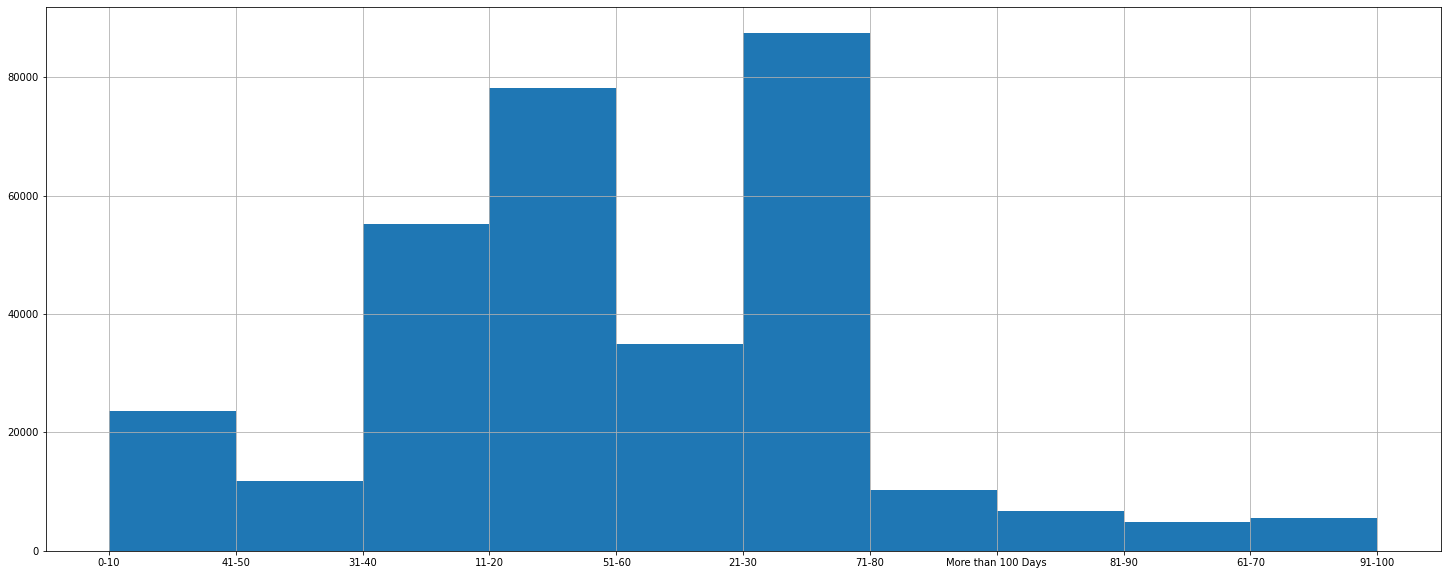

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
train_data['Stay'].hist()
plt.show()

In [ ]:
train_data.groupby(train_data.Stay).count()['case_id']*100/train_data.shape[0]

Stay
0-10                   7.412432
11-20                 24.538215
21-30                 27.475050
31-40                 17.321739
41-50                  3.687688
51-60                 10.996803
61-70                  0.861706
71-80                  3.220093
81-90                  1.519291
91-100                 0.868301
More than 100 Days     2.098682
Name: case_id, dtype: float64

Dataset has Class Imbalance 

### Age

Age is mentioned in ranges, which makes it categorical but it is ordinal in nature. Age group ordering 0-10 < 11-20 < 21-30 < ... < 91-100

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


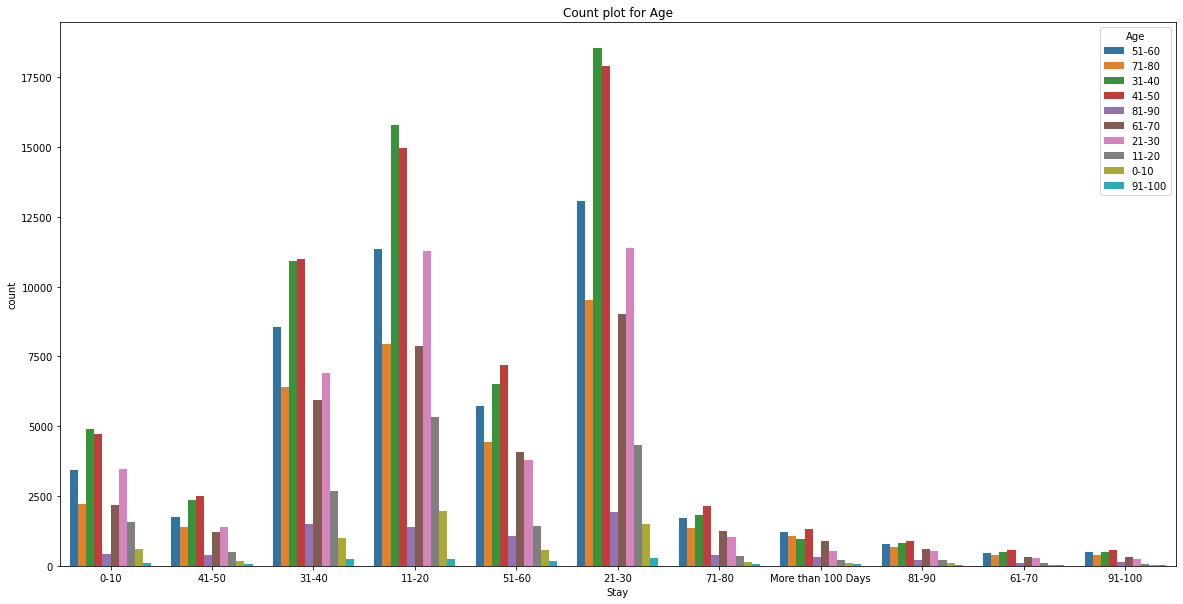

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 10))
sns.countplot(x='Stay', data=train_data,hue='Age')\
    .set(title='Count plot for Age')
plt.show()

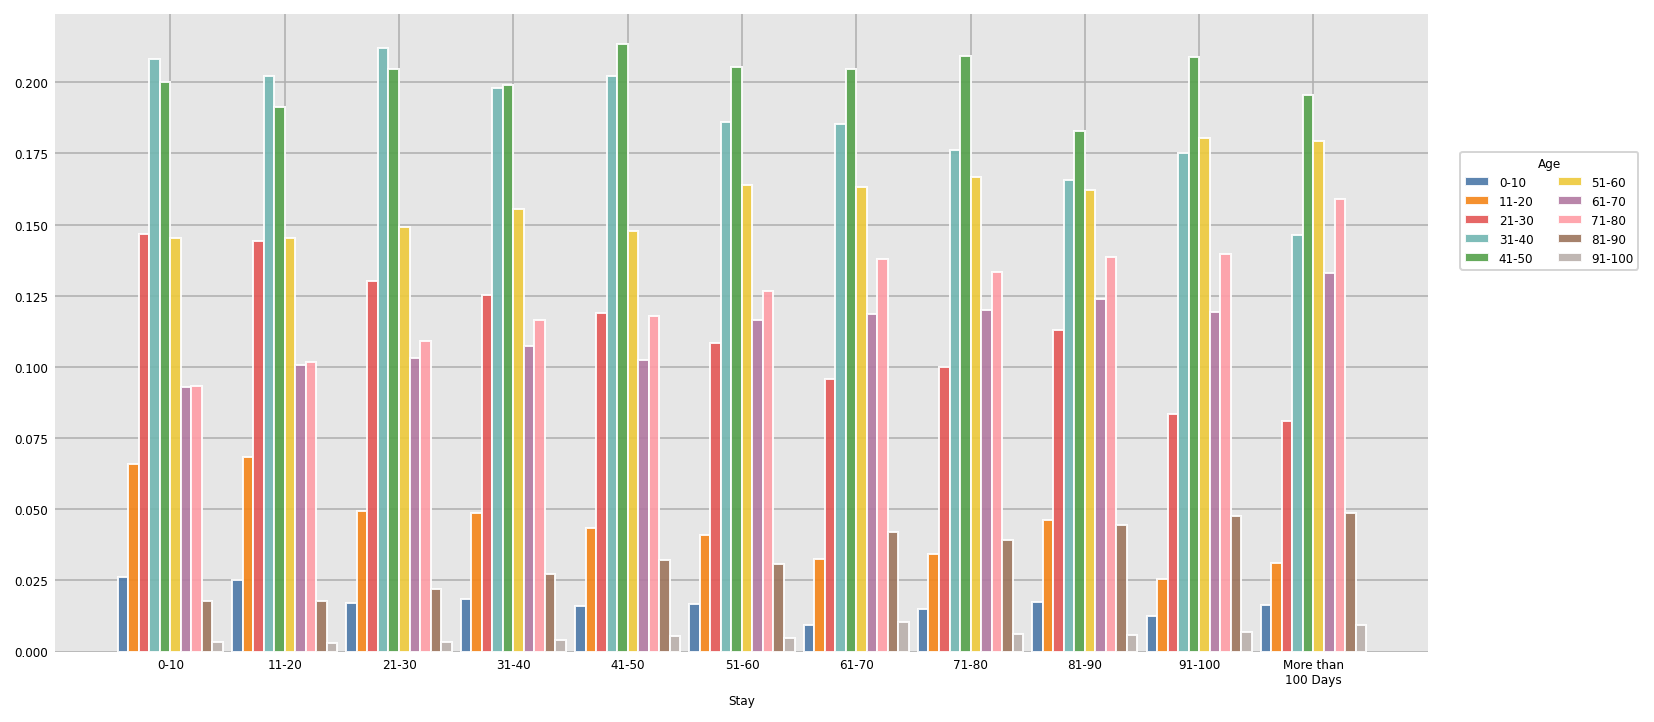

In [ ]:
import dexplot as dxp
dxp.count('Stay', data=train_data, split='Age', normalize='Stay',figsize=(10, 5))

In [ ]:
import numpy as np
age_groups = np.unique(train_data['Age'].values)
for age_group in age_groups:
  train_data_age_group = train_data[train_data.Age == age_group]
  print('Age Group: ',age_group)
  print(train_data_age_group.groupby(train_data_age_group.Stay).count()['case_id']*100/train_data_age_group.shape[0])
  print("*"*25)


Age Group:  0-10
Stay
0-10                   9.833706
11-20                 31.323953
21-30                 23.808762
31-40                 16.213623
41-50                  2.990086
51-60                  9.306044
61-70                  0.415734
71-80                  2.446434
81-90                  1.343140
91-100                 0.559642
More than 100 Days     1.758874
Name: case_id, dtype: float64
*************************
Age Group:  11-20
Stay
0-10                   9.255725
11-20                 31.864265
21-30                 25.715649
31-40                 15.988788
41-50                  3.041508
51-60                  8.522185
61-70                  0.530773
71-80                  2.087309
81-90                  1.329914
91-100                 0.423426
More than 100 Days     1.240458
Name: case_id, dtype: float64
*************************
Age Group:  21-30
Stay
0-10                   8.488603
11-20                 27.598364
21-30                 27.897069
31-40               

General trend expected is that older people will stay more days. In category like **More than 100 days** it can be observed.

### Severity of Illness
Severity is also ordinal in nature. Extreme > Moderate > Minor

In [ ]:
train_data['Severity of Illness'].unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

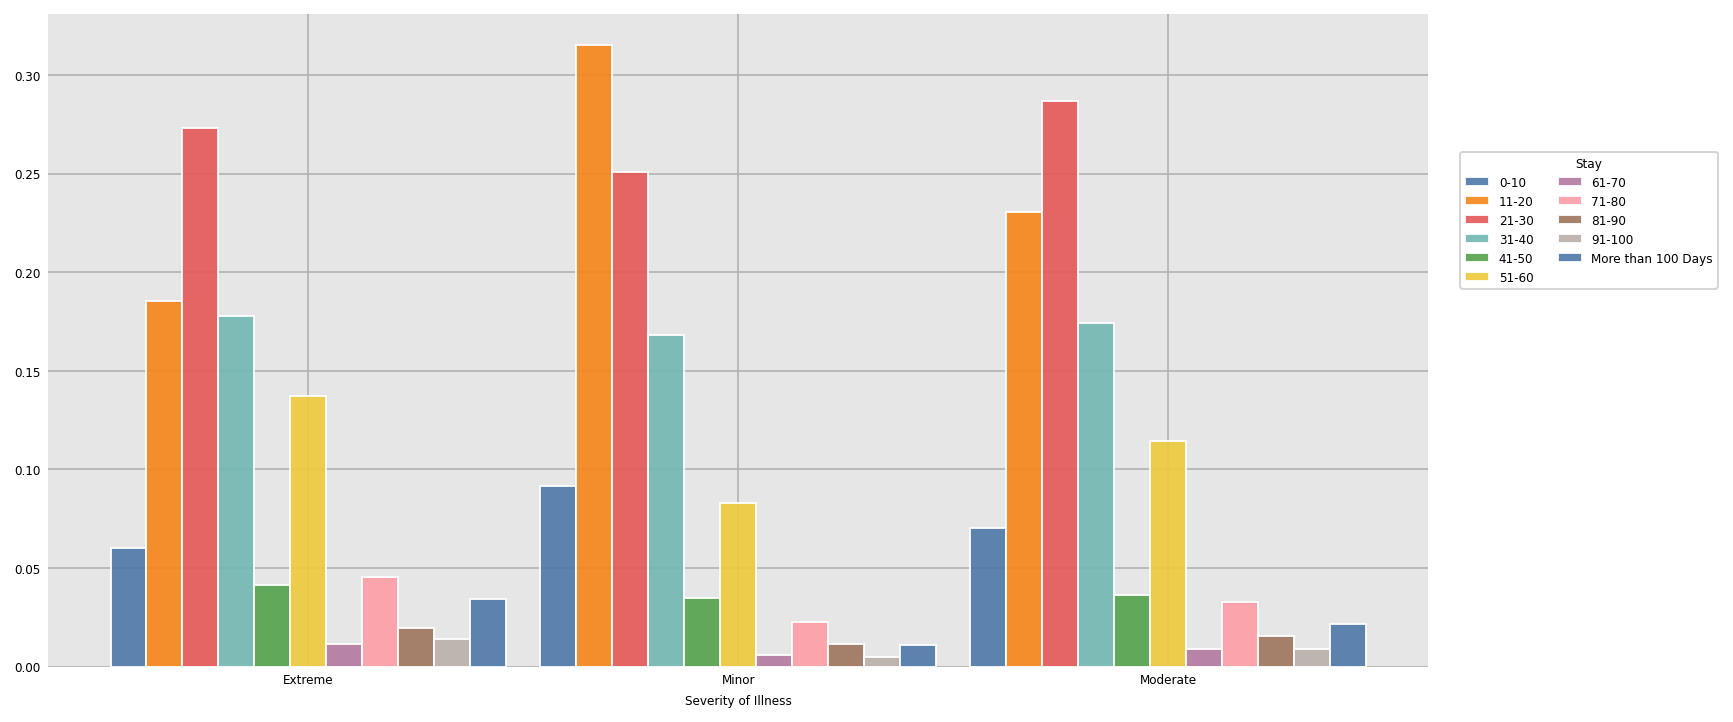

In [ ]:
import dexplot as dxp
dxp.count('Severity of Illness', data=train_data, split='Stay', normalize='Severity of Illness',figsize=(10, 5),x_order = ['Minor','Moderate','Extreme'])

When severity increases from Minor to Extreme, stay increases for almost all stay categories.

### Visitors with Patient

In [ ]:
train_data['Visitors with Patient'].unique()

array([ 2,  4,  3,  8,  6,  7, 13,  5,  1, 10, 15, 11, 12,  9, 24, 16, 14,
       20,  0, 19, 18, 17, 23, 21, 32, 30, 22, 25])

In [ ]:
import numpy as np
class_labels = np.unique(train_data['Stay'].values)
for class_label in class_labels:
  train_data_class = train_data[train_data.Stay == class_label]
  print('Stay: ',class_label)
  print("Min: ",train_data_class[['Visitors with Patient']].min()[0]," Max: ",train_data_class[['Visitors with Patient']].max()[0]," Median: ",train_data_class[['Visitors with Patient']].median()[0])
  print("*"*25)

Stay:  0-10
Min:  1  Max:  6  Median:  2.0
*************************
Stay:  11-20
Min:  0  Max:  10  Median:  2.0
*************************
Stay:  21-30
Min:  0  Max:  12  Median:  2.0
*************************
Stay:  31-40
Min:  0  Max:  16  Median:  3.0
*************************
Stay:  41-50
Min:  1  Max:  20  Median:  3.0
*************************
Stay:  51-60
Min:  0  Max:  22  Median:  4.0
*************************
Stay:  61-70
Min:  1  Max:  15  Median:  3.0
*************************
Stay:  71-80
Min:  1  Max:  16  Median:  4.0
*************************
Stay:  81-90
Min:  1  Max:  17  Median:  6.0
*************************
Stay:  91-100
Min:  1  Max:  20  Median:  4.0
*************************
Stay:  More than 100 Days
Min:  1  Max:  32  Median:  7.0
*************************


General trend is that as the number of vistors increase, days of stay increases.

### Department

### Available Extra Rooms in Hospital

### Hospital_region_code

## BIVARIATE ANALYSIS

# **FEATURE ENGINEERING**

In [ ]:
#try grouping age categories

# **PYCARET**

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 3.0MB/s 
     |████████████████████████████████| 266kB 8.8MB/s 
     |████████████████████████████████| 1.6MB 13.4MB/s 
     |████████████████████████████████| 66.1MB 58kB/s 
     |████████████████████████████████| 174kB 45.8MB/s 
     |████████████████████████████████| 6.8MB 34.3MB/s 
     |████████████████████████████████| 266kB 50.1MB/s 
     |████████████████████████████████| 1.8MB 43.3MB/s 
     |████████████████████████████████| 13.9MB 331kB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 604kB 48.6MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 3.1MB 39.9MB/s 
     |████████████████████████████████| 552kB 58.3MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     

In [ ]:
import numpy as unique
ordinal_features_dict = dict()
age_order = list(np.unique(train_data['Age'].values))
age_order.sort()
ordinal_features_dict['Age'] = age_order
ordinal_features_dict['Severity of Illness'] = ['Minor','Moderate','Extreme']

In [ ]:
train_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = train_data,#[['Age','Admission_Deposit', 'Stay','Type of Admission','Department',
                    #                    'Severity of Illness', 'Visitors with Patient','City_Code_Patient','Bed Grade',]],
                    train_size = 0.999,#ordinal_features = ordinal_features_dict,
                    normalize=False,normalize_method='minmax',transformation = True,fix_imbalance = False,
                    polynomial_features=True,trigonometry_features=True,feature_selection = False,
                    target = 'Stay', session_id=123,remove_outliers = False,polynomial_degree = 2)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,"0-10: 0, 11-20: 1, 21-30: 2, 31-40: 3, 41-50: 4, 51-60: 5, 61-70: 6, 71-80: 7, 81-90: 8, 91-100: 9, More than 100 Days: 10"
3,Original Data,"(318438, 18)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
compare_models(turbo=False,fold = 3,exclude=['gpc','rbfsvm','knn','qda','mlp','lda','dt','ada'],sort='Accuracy')

In [ ]:
print(create_model.__doc__)

  
    This function creates a model and scores it using Stratified Cross Validation. 
    The output prints a score grid that shows Accuracy, AUC, Recall, Precision, 
    F1, Kappa and MCC by fold (default = 10 Fold). 

    This function returns a trained model object. 

    setup() function must be called before using create_model()

    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> experiment_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')

    This will create a trained Logistic Regression model.

    Parameters
    ----------
    estimator : string / object, default = None
        Enter ID of the estimators available in model library or pass an untrained model 
        object consistent with fit / predict API to train and evaluate model. All 
        estimators support binary or multiclass problem. List of estimators in model 
        library (ID - Name):

        * 'lr' - Logistic Regre

In [ ]:
classifier = create_model(estimator='lightgbm',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4202,0.0000,0.2519,0.4138,0.3850,0.2556,0.2629
1,0.4247,0.0000,0.2517,0.4114,0.3907,0.2618,0.2686
2,0.4245,0.0000,0.2480,0.4024,0.3902,0.2611,0.2682
3,0.4235,0.0000,0.2491,0.4038,0.3890,0.2600,0.2668
4,0.4228,0.0000,0.2468,0.4043,0.3866,0.2590,0.2661
5,0.4272,0.0000,0.2515,0.4040,0.3899,0.2640,0.2716
6,0.4260,0.0000,0.2524,0.4079,0.3903,0.2632,0.2705
7,0.4267,0.0000,0.2476,0.4130,0.3909,0.2637,0.2709
8,0.4219,0.0000,0.2499,0.3969,0.3857,0.2580,0.2651
9,0.4230,0.0000,0.2455,0.4212,0.3876,0.2581,0.2656


In [ ]:
classifier = tune_model(estimator='lightgbm',fold=10)

SystemExit: ignored

In [ ]:
classifier_et = create_model(estimator='gbc',fold=3)

In [ ]:
pred_df = predict_model(data = test_data,estimator = classifier)

In [ ]:
y_pred = pred_df['Label'].values

# **REGRESSION PROBLEM**
Since the Stay is ordinal in nature, problem can also be considered as a regression.

In [ ]:
#use the ordinal variables
#age,severity,visitors,etc

# **H2O AUTOML**

In [ ]:
!pip install h2o

     |████████████████████████████████| 129.3MB 99kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.1-py2.py3-none-any.whl size=129358602 sha256=0fce05f395b5a5e103489be680c82108184f7abf4a4cf0a21c9923b8b19e9ccd
  Stored in directory: /root/.cache/pip/wheels/33/ac/52/165c35d747abdb629c3c9fb7e087f360c662d8cb58824caed8
Successfully built h2o


In [ ]:
#https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e


# **SUBMISSION**

In [ ]:
import pandas as pd
submission_df = pd.DataFrame(data=list(zip(test_data['case_id'].values,y_pred)),columns=['case_id','Stay'])
submission_df.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [ ]:
submission_df.to_csv('/content/drive/My Drive/ML_challenges/analytics_vidhya_healthcare/pred_version_5_lightgbm_impute.csv',index = None)

# **FEATURE IMPORTANCES**
It is important to understand which features are most helpful in determining the length of the stay of the patients.